In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import xgboost as xgb
from sklearn.metrics import mean_squared_error


## Data Prep

In [6]:
data = pd.read_excel("owid-covid-data.xlsx")

In [8]:
# picking out our 10 countries that have relatively low missingness and that are adjacent 
country_list = [
    'Spain', 'France', 'Germany', 'Ireland', 'United Kingdom',
    'Italy', 'Belgium', 'Netherlands', 'Switzerland', 'Luxembourg'
]
selected_data = data[data['location'].isin(country_list)]
selected_data.head()


iso_code continent location        date  total_cases  new_cases  \
28497      BEL    Europe  Belgium  2020-01-03          NaN        0.0   
28498      BEL    Europe  Belgium  2020-01-04          NaN        0.0   
28499      BEL    Europe  Belgium  2020-01-05          NaN        0.0   
28500      BEL    Europe  Belgium  2020-01-06          NaN        0.0   
28501      BEL    Europe  Belgium  2020-01-07          NaN        0.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
28497                 NaN           NaN         0.0                  NaN  ...   
28498                 NaN           NaN         0.0                  NaN  ...   
28499                 NaN           NaN         0.0                  NaN  ...   
28500                 NaN           NaN         0.0                  NaN  ...   
28501                 NaN           NaN         0.0                  NaN  ...   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
28497          31.4                     NaN                        5.64   
28498          31.4                     NaN                        5.64   
28499          31.4                     NaN                        5.64   
28500          31.4                     NaN                        5.64   
28501          31.4                     NaN                        5.64   

       life_expectancy  human_development_index  population  \
28497            81.63                    0.931    11655923   
28498            81.63                    0.931    11655923   
28499            81.63                    0.931    11655923   
28500            81.63                    0.931    11655923   
28501            81.63                    0.931    11655923   

       excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
28497                                   NaN                          NaN   
28498                                   NaN                          NaN   
28499                                -151.3                        -6.34   
28500                                   NaN                          NaN   
28501                                   NaN                          NaN   

       excess_mortality  excess_mortality_cumulative_per_million  
28497               NaN                                      NaN  
28498               NaN                                      NaN  
28499             -6.34                               -13.086293  
28500               NaN                                      NaN  
28501               NaN                                      NaN  

[5 rows x 67 columns]

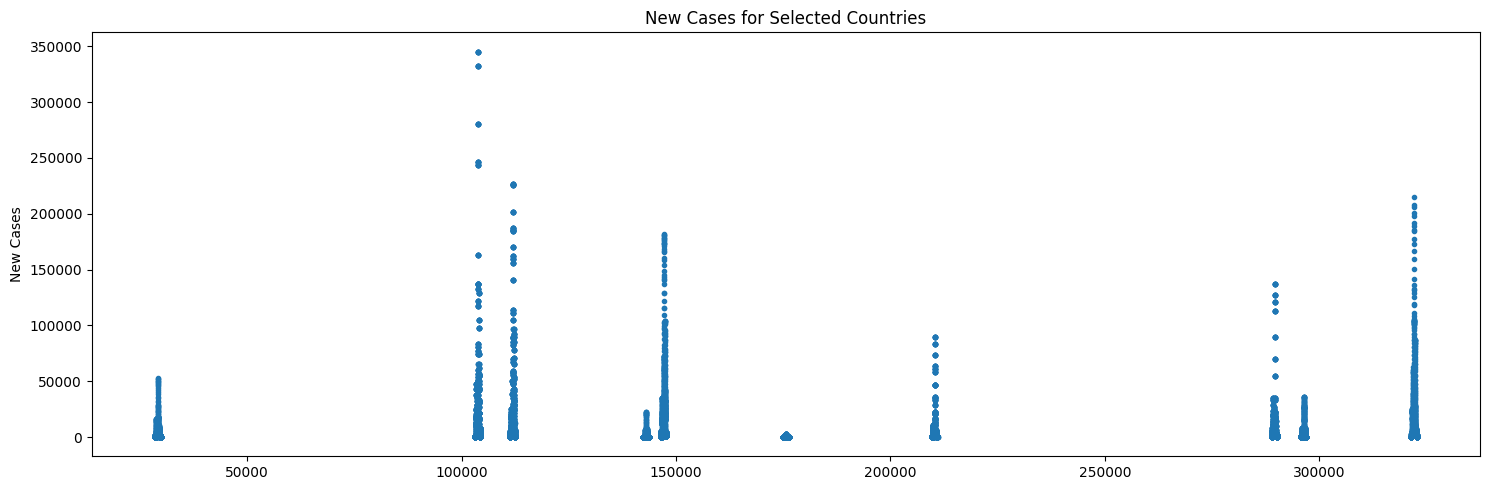

In [10]:
## Plotting Switzerland

plt.figure(figsize=(15, 5))
selected_data['new_cases_smoothed'].plot(style='.', title=f'New Cases for Selected Countries')
plt.ylabel('New Cases')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

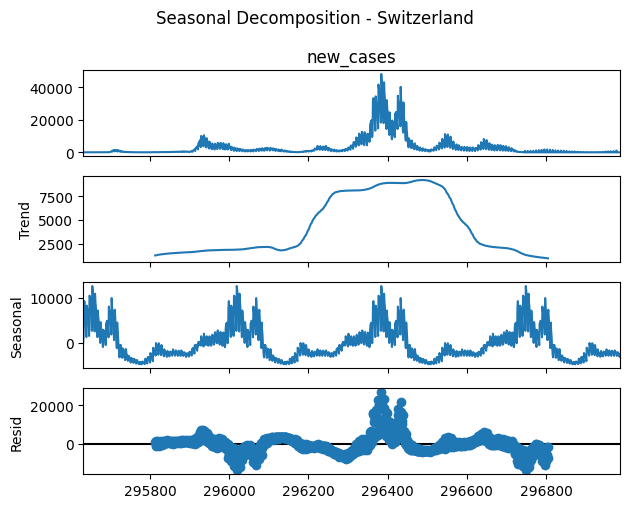

In [8]:
## checking time series decomp
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(swiss_data['new_cases'], period=365)
    
plt.figure(figsize=(10, 6))
    
# Create plots
result.plot()
    
# Set the title with a higher y value to shift it up
plt.suptitle(f'Seasonal Decomposition - Switzerland', y=1.05)
    
# Display the figure
plt.show()

Seasonal trend is additive, not multiplicative.

## Data Prep

In [9]:
# missing values?
missing_values_count_before = swiss_data['new_cases'].isnull().sum()
print(missing_values_count_before)


0


## Prophet 

In [10]:
# rename columns into ds & y
swiss_data = swiss_data.rename(columns={'date': 'ds', 'new_cases': 'y'})



# initialize and fit prophet
m = Prophet()
m.fit(swiss_data)

12:32:26 - cmdstanpy - INFO - Chain [1] start processing
12:32:27 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
# setting future dates
future = m.make_future_dataframe(periods=14)
future.tail()



ds
1366 2023-09-30
1367 2023-10-01
1368 2023-10-02
1369 2023-10-03
1370 2023-10-04

In [12]:
# Python predict
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



ds         yhat   yhat_lower   yhat_upper
1366 2023-09-30   386.069248 -4146.727434  4689.768326
1367 2023-10-01  -666.942913 -5630.908698  4363.181316
1368 2023-10-02  -918.810573 -5689.896219  4028.426038
1369 2023-10-03  1818.882818 -2645.779803  6935.974243
1370 2023-10-04  1361.000425 -3604.675093  6337.666857

## Plotting Forecast

/Users/timhong/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/timhong/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


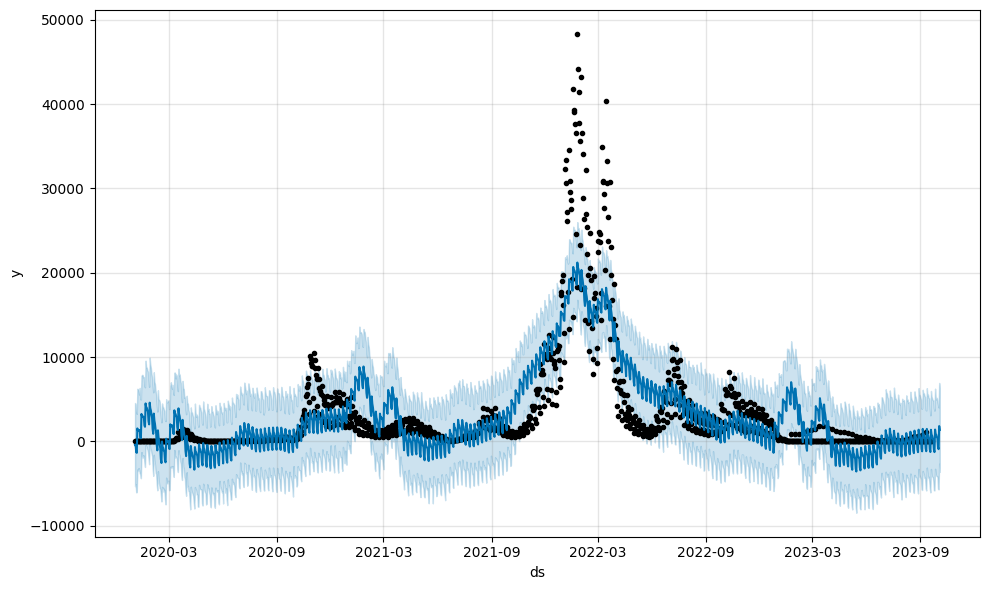

In [13]:
# Python
fig1 = m.plot(forecast)



## Plotting Components

/Users/timhong/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/timhong/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/timhong/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the

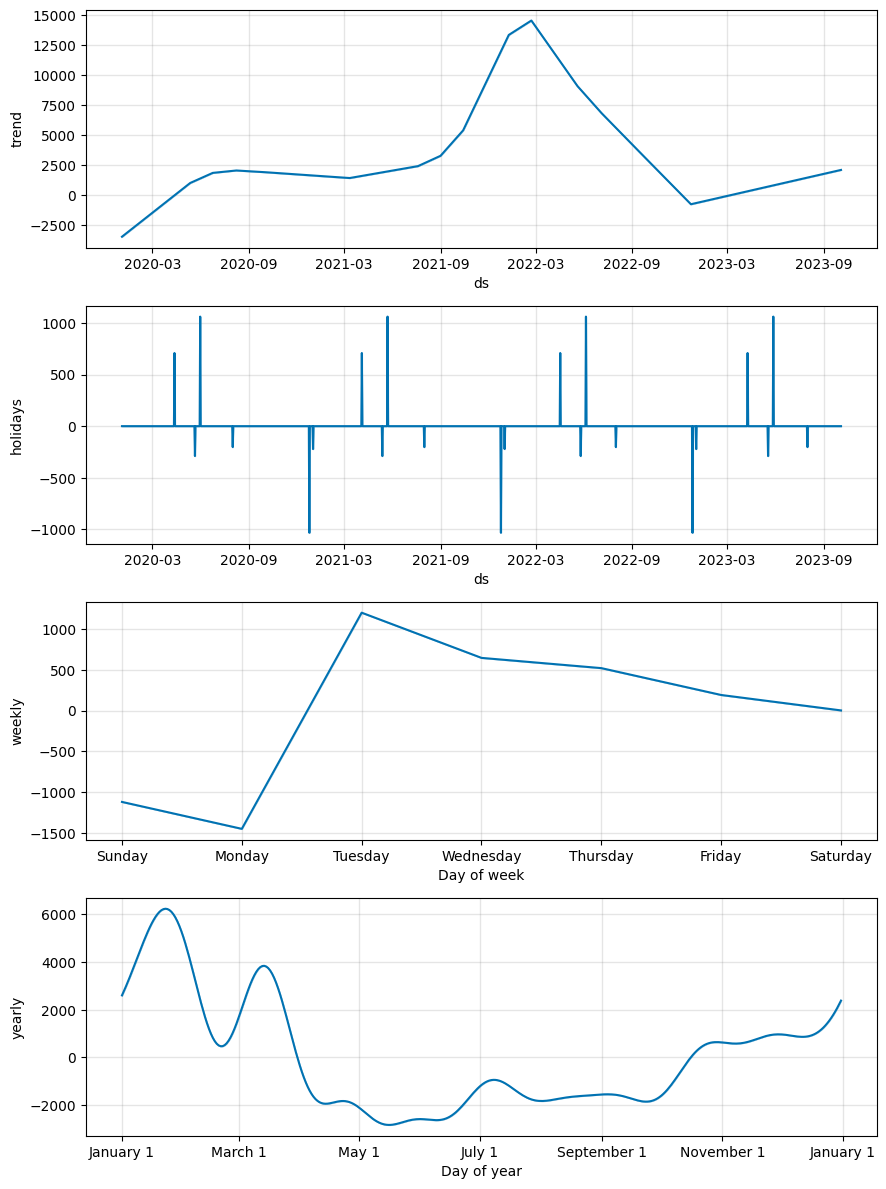

In [14]:
# Python
fig2 = m.plot_components(forecast)

## Initial Predictions and RMSE

13:26:12 - cmdstanpy - INFO - Chain [1] start processing


(1343, 2) (14, 2)


13:26:13 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/rt/z4vyc0q16r1f4wgfk65s0psm0000gn/T/ipykernel_33664/2081610594.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ds'] = pd.to_datetime(train['ds'])
/var/folders/rt/z4vyc0q16r1f4wgfk65s0psm0000gn/T/ipykernel_33664/2081610594.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ds'] = pd.to_datetime(test['ds'])


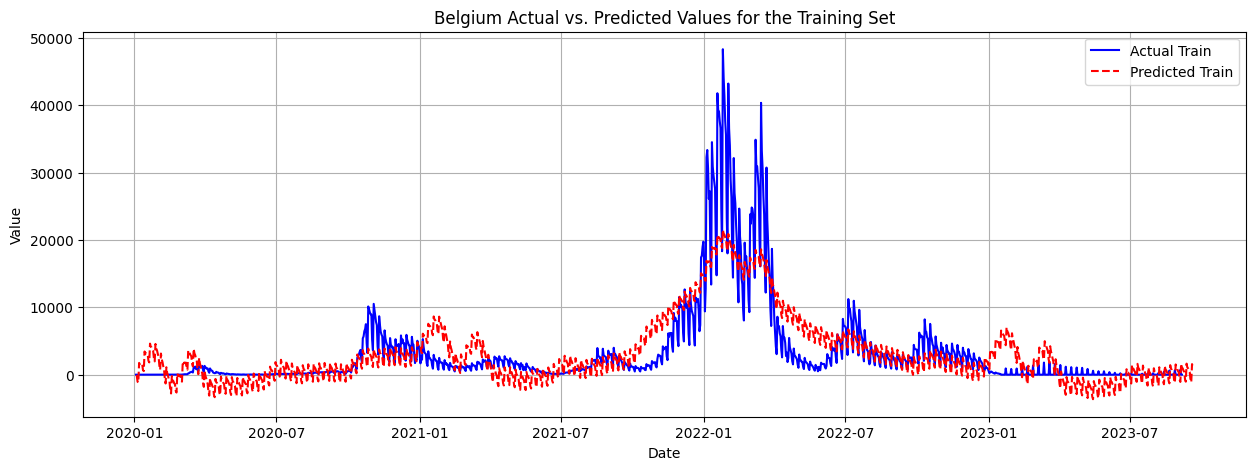

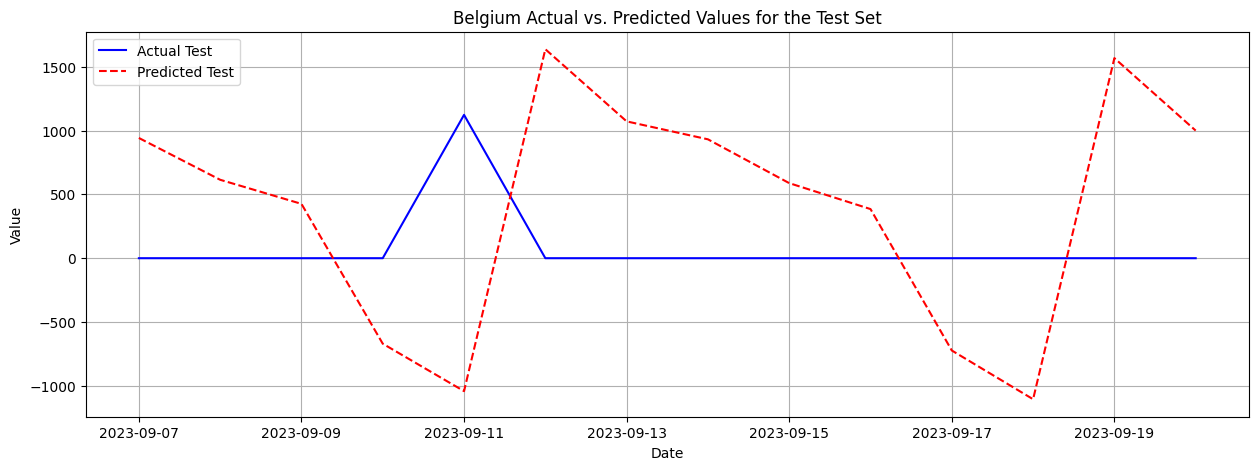

RMSE for the test set: 1101.0196410822946


/var/folders/rt/z4vyc0q16r1f4wgfk65s0psm0000gn/T/ipykernel_33664/2081610594.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ds'] = pd.to_datetime(train['ds'])
/var/folders/rt/z4vyc0q16r1f4wgfk65s0psm0000gn/T/ipykernel_33664/2081610594.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ds'] = pd.to_datetime(test['ds'])


In [48]:
# split the data into train and test
# setting train end date to 2 weeks before dataset's end date

train_end_date = '2023-09-06'  
train = swiss_data[swiss_data['ds'] <= train_end_date]
test = swiss_data[swiss_data['ds'] > train_end_date]

print(train.shape, test.shape)

# initialize and fit prophet - keeping holidays and optimally tuned params
m = Prophet()
# adding swiss holidays
m.fit(train)

# setting future dates
future = m.make_future_dataframe(periods=14)

# Python predict
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# Assuming 'ds' is a string representing dates, convert it to datetime
train['ds'] = pd.to_datetime(train['ds'])
test['ds'] = pd.to_datetime(test['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])

test_pred = forecast[forecast['ds'] > train_end_date]
test_pred = test_pred.set_index('ds')

# Plot for the training set
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(train['ds'], train['y'], label='Actual Train', color='b')
ax.plot(forecast['ds'], forecast['yhat'], label='Predicted Train', color='r', linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Belgium Actual vs. Predicted Values for the Training Set')
ax.legend()
plt.grid(True)
plt.show()

# Plot for the test set
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(test['ds'], test['y'], label='Actual Test', color='b')
ax.plot(forecast['ds'].tail(len(test)), forecast['yhat'].tail(len(test)), label='Predicted Test', color='r', linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Belgium Actual vs. Predicted Values for the Test Set')
ax.legend()
plt.grid(True)
plt.show()# Assuming 'ds' is a string representing dates, convert it to datetime
train['ds'] = pd.to_datetime(train['ds'])
test['ds'] = pd.to_datetime(test['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])


# Extract the actual and forecasted values for the test set
actual_test_values = test['y'].values
predicted_test_values = forecast['yhat'].tail(len(test)).values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_test_values, predicted_test_values))
print(f"RMSE for the test set: {rmse}")

## Adding Swiss Holidays and COVID Lockdown Dates
I want to use the holidays feature of prophet to add 1). Swiss Holidays, and 2). important lockdown-related dates of Switzerland. On 3/19/2020, Switzerland imposed a lockdown, which eased on 6/25/2020. 10/01/2020 marks the beginning of another lockdown, which was then eased on 9/13/2021. 2/17/2022 is when all restrictions were lifted. 

I will add these dates as one-off (non-recurring) holidays!

In [40]:
# Python
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-19', 'lower_window': 0, 'ds_upper': '2020-06-25'},
    {'holiday': 'lockdown_2', 'ds': '2020-10-01', 'lower_window': 0, 'ds_upper': '2021-09-21'},
    {'holiday': 'lockdown_3', 'ds': '2021-12-01', 'lower_window': 0, 'ds_upper': '2022-02-17'}
])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days

lockdowns

holiday         ds  lower_window   ds_upper  upper_window
0  lockdown_1 2020-03-19             0 2020-06-25            98
1  lockdown_2 2020-10-01             0 2021-09-21           355
2  lockdown_3 2021-12-01             0 2022-02-17            78

12:51:59 - cmdstanpy - INFO - Chain [1] start processing
12:52:00 - cmdstanpy - INFO - Chain [1] done processing
/Users/timhong/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/timhong/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/Users/timhong/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydat

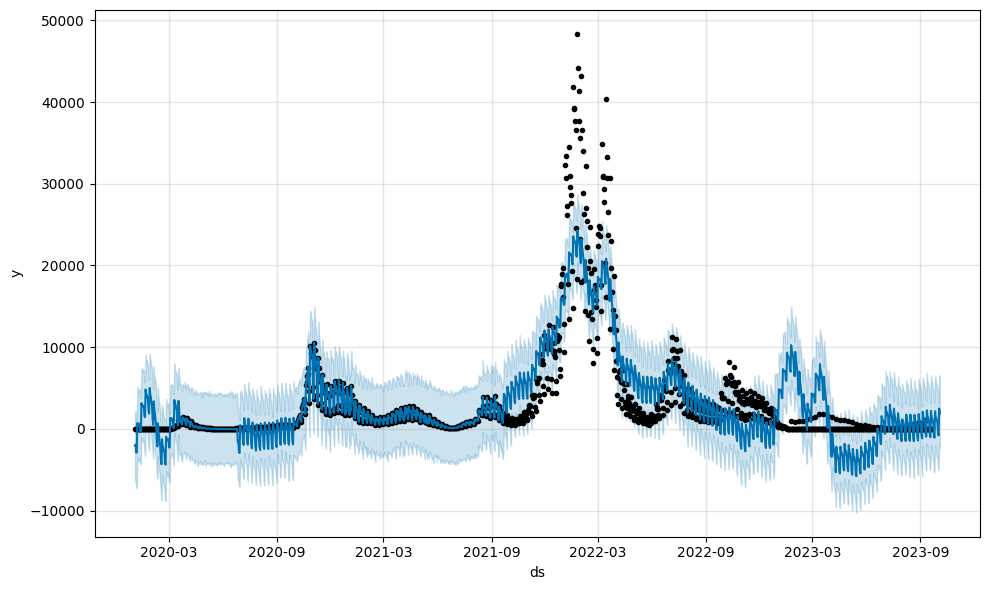

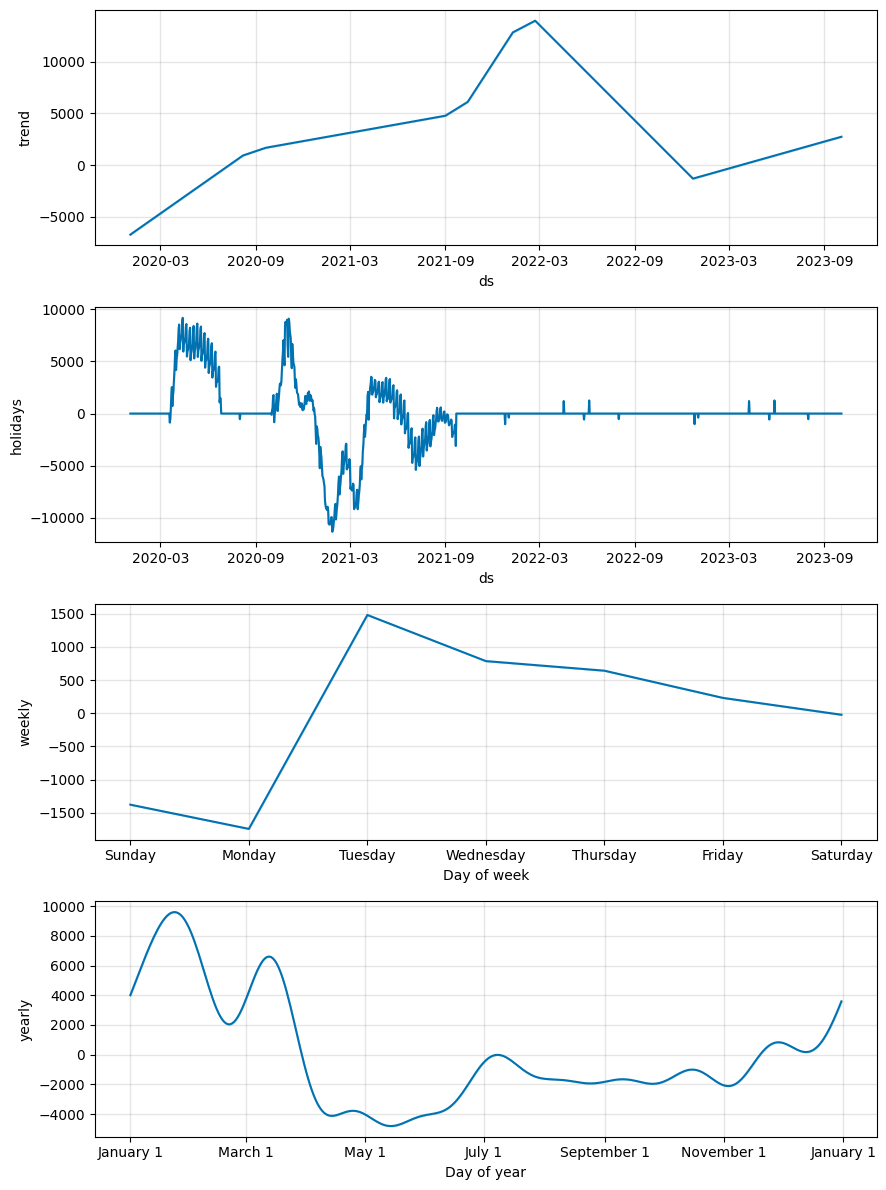

In [34]:
# initialize and fit prophet
m = Prophet(holidays = lockdowns)
# adding swiss holidays
m.add_country_holidays(country_name='Switzerland')
m.fit(swiss_data)

# setting future dates
future = m.make_future_dataframe(periods=14)
future.tail()

# Python predict
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# Plot
fig4 = m.plot(forecast)
fig5 = m.plot_components(forecast)
plt.show()

In [17]:
# looking at holiday names
m.train_holiday_names

0        lockdown_1
1        lockdown_2
2        lockdown_3
3    New Year's Day
4     Easter Sunday
5     Ascension Day
6       Whit Sunday
7      National Day
8     Christmas Day
dtype: object

2020-03-19: Initial lockdown kept cases low early 2020.
2020-06-25: Due to these initial good results, regulations gradually eased by Summer 2020.
2020-10-01: There was a small spike during this time, makes sense that regulations increased again.
2021-09-13: Very low number of cases in Sep 2021, so makes sense that regulations were not increased. These lax regulations then lead to the greatest spike in new_cases between Sep 2021 and Sep 2022.
2022-02-17: By Feb 2022, cases have died down, and restrictions are basically fully lifted.

This significantly helped our predictions



## Examining Predictions' Tail

/Users/timhong/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/timhong/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/Users/timhong/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of 

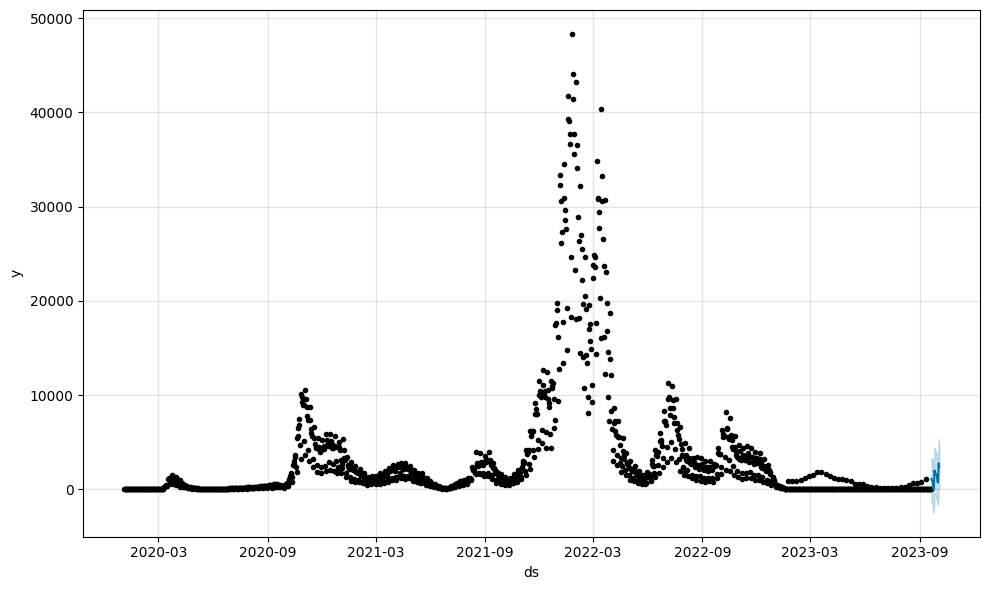

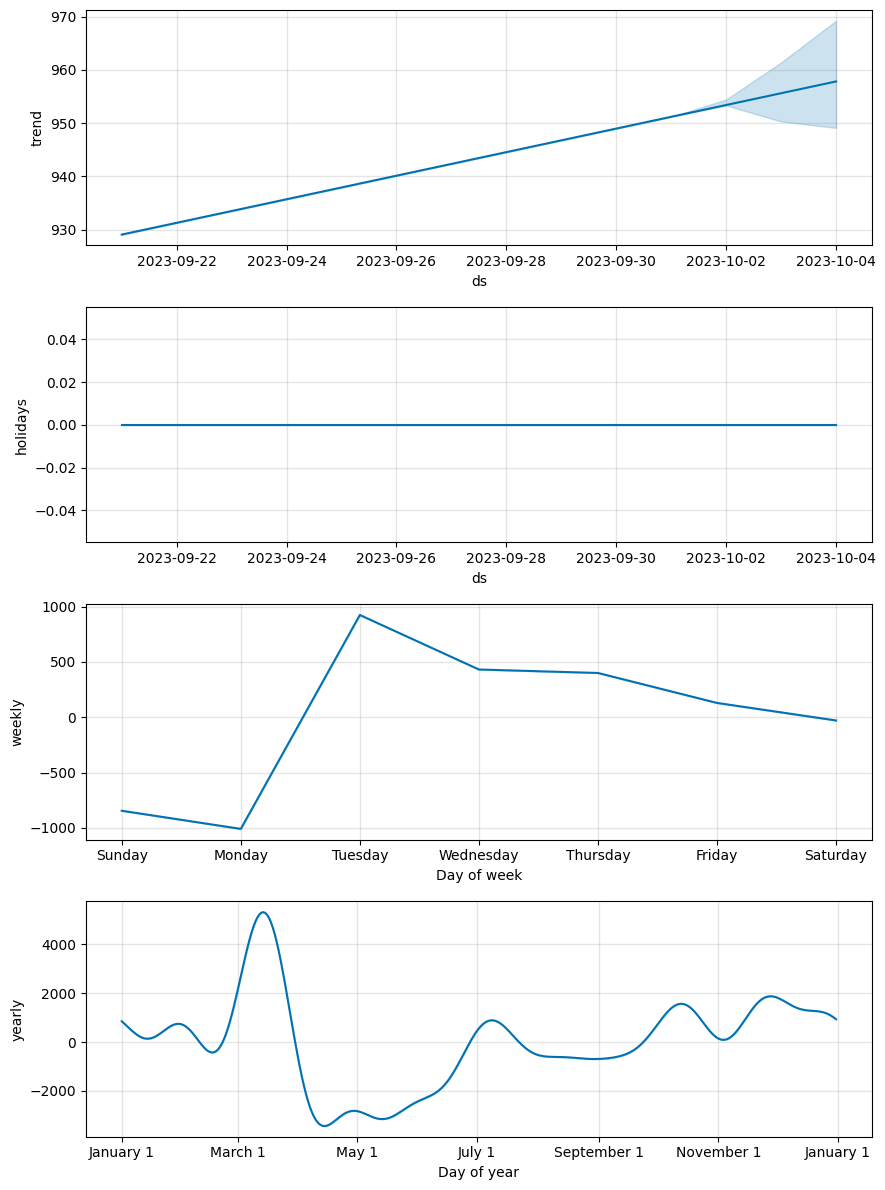

In [18]:
forecast_14_days = forecast.tail(14)
fig3 = m.plot(forecast_14_days)
fig4 = m.plot_components(forecast_14_days)
plt.show()

Very wide prediction interval, so we will remove outliers.

## Removing Outliers

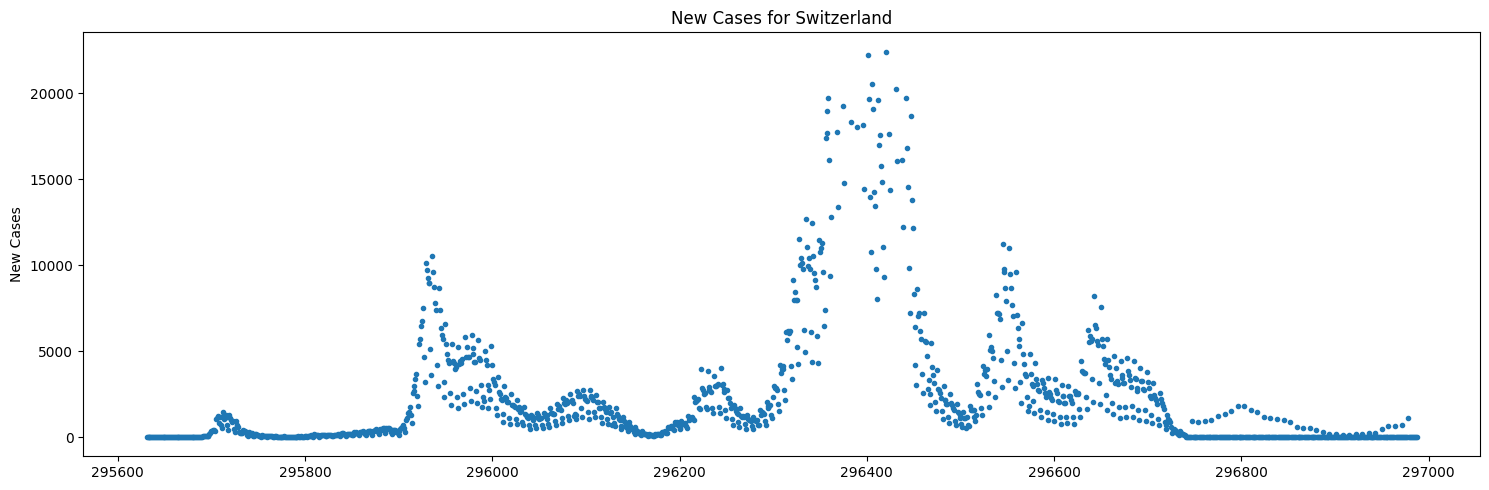

In [19]:
# setting outliers
z_scores = np.abs(stats.zscore(swiss_data['y']))
threshold = 3  # Adjust this threshold as needed
outliers = swiss_data['y'][z_scores > threshold]

# removing outliers
swiss_data_clean = swiss_data[~swiss_data['y'].isin(outliers)]

# examining plot
plt.figure(figsize=(15, 5))
swiss_data_clean['y'].plot(style='.', title=f'New Cases for Switzerland')
plt.ylabel('New Cases')

plt.tight_layout()
plt.show()

## Checking Prophet Again

12:32:32 - cmdstanpy - INFO - Chain [1] start processing
12:32:32 - cmdstanpy - INFO - Chain [1] done processing
/Users/timhong/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/timhong/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


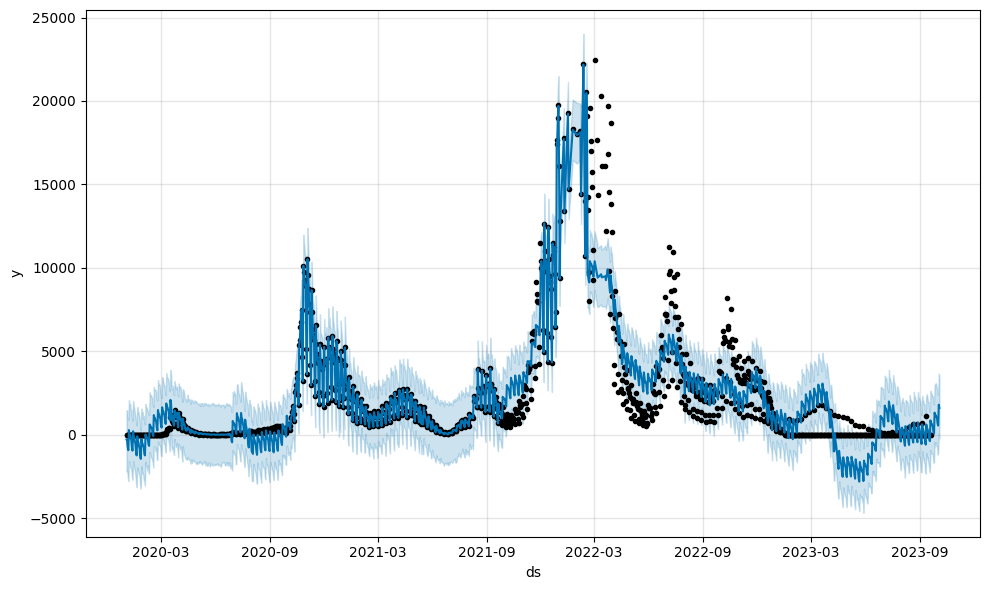

In [20]:
# initialize and fit prophet
# include lockdown dates
m = Prophet(holidays = lockdowns)
# adding swiss holidays
m.add_country_holidays(country_name='Switzerland')
m.fit(swiss_data_clean)

# setting future dates
future = m.make_future_dataframe(periods=14)
future.tail()

# Python predict
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


# Plot
fig4 = m.plot(forecast)
plt.show()



Removing Outliers did not do too much to help the prediction, I will try examining trend changepoints because our COVID data seems to spike at certain times. 

## Trend Changepoints

### Automatic Changepoint Detection

12:32:33 - cmdstanpy - INFO - Chain [1] start processing
12:32:34 - cmdstanpy - INFO - Chain [1] done processing
/Users/timhong/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/timhong/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


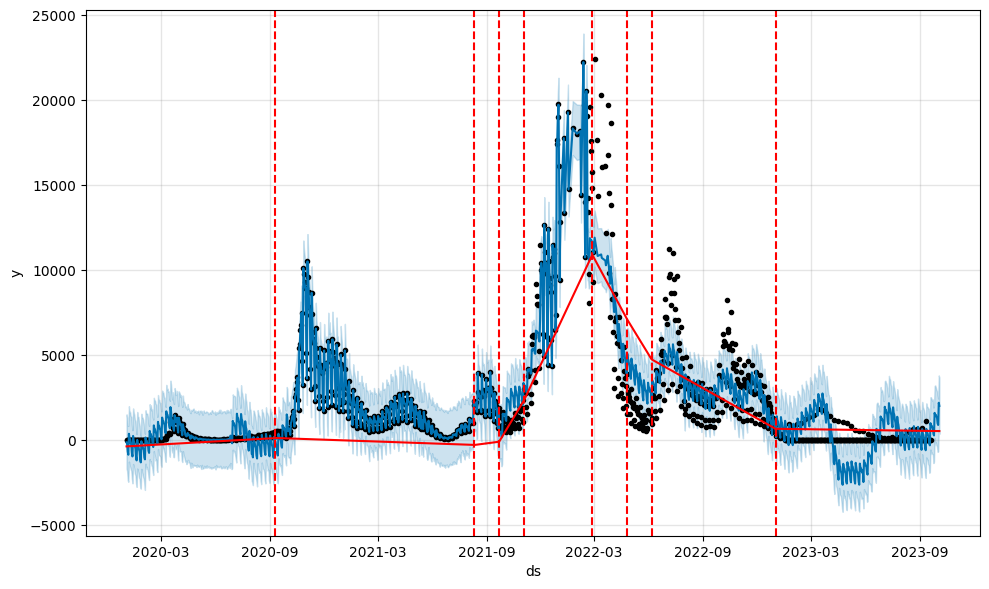

In [21]:
# initialize and fit prophet
m = Prophet(holidays = lockdowns, changepoint_prior_scale=0.08)
# adding swiss holidays
m.add_country_holidays(country_name='Switzerland')
m.fit(swiss_data_clean)

# setting future dates
future = m.make_future_dataframe(periods=14)
future.tail()

# Python predict
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


This seems useful, but I want to tune the changepoint CV to find the optimal value of changepoint_prior_scale.

## CV and Tuning Hyperparameters

In [22]:
# initialize and fit prophet
m = Prophet(holidays = lockdowns)
# adding swiss holidays
m.add_country_holidays(country_name='Switzerland')
m.fit(swiss_data_clean)

# setting future dates
future = m.make_future_dataframe(periods=14)
future.tail()

# Python predict
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

12:32:35 - cmdstanpy - INFO - Chain [1] start processing
12:32:36 - cmdstanpy - INFO - Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper
1319 2023-09-30  1019.665062  -760.149221  2757.812380
1320 2023-10-01   678.332554 -1041.756727  2498.981408
1321 2023-10-02   558.744572 -1375.576041  2349.629576
1322 2023-10-03  1806.836600     0.325716  3605.574249
1323 2023-10-04  1618.265792  -180.027890  3430.177875

In [23]:
# horizon of 14 days
swiss_data_cv = cross_validation(m, initial='730 days', period='180 days', horizon='14 days')
swiss_data_p = performance_metrics(swiss_data_cv)



  0%|          | 0/4 [00:00<?, ?it/s]

12:32:36 - cmdstanpy - INFO - Chain [1] start processing
12:32:37 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 1/4 [00:00<00:02,  1.37it/s]12:32:37 - cmdstanpy - INFO - Chain [1] start processing
12:32:38 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 2/4 [00:01<00:01,  1.02it/s]12:32:38 - cmdstanpy - INFO - Chain [1] start processing
12:32:39 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 3/4 [00:03<00:01,  1.24s/it]12:32:40 - cmdstanpy - INFO - Chain [1] start processing
12:32:40 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 4/4 [00:04<00:00,  1.13s/it]


In [24]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(swiss_data_clean)  # Fit model with given params
    df_cv = cross_validation(m, horizon='14 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

12:32:41 - cmdstanpy - INFO - Chain [1] start processing
12:32:41 - cmdstanpy - INFO - Chain [1] done processing
Importing plotly failed. Interactive plots will not work.
12:32:42 - cmdstanpy - INFO - Chain [1] start processing
12:32:42 - cmdstanpy - INFO - Chain [1] done processing
12:32:42 - cmdstanpy - INFO - Chain [1] start processing
12:32:42 - cmdstanpy - INFO - Chain [1] done processing
12:32:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:32:42 - cmdstanpy - INFO - Chain [1] start processing
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
12:32:42 - cmdstanpy - INFO - Chain [1] st

    changepoint_prior_scale  seasonality_prior_scale         rmse
0                     0.001                     0.01  3836.666633
1                     0.001                     0.10  3894.068457
2                     0.001                     1.00  3892.267614
3                     0.001                    10.00  3889.653539
4                     0.010                     0.01  3786.412202
5                     0.010                     0.10  3912.355649
6                     0.010                     1.00  3911.045130
7                     0.010                    10.00  3917.498619
8                     0.100                     0.01  3444.472335
9                     0.100                     0.10  3140.690379
10                    0.100                     1.00  3172.826455
11                    0.100                    10.00  3173.417843
12                    0.500                     0.01  3025.978880
13                    0.500                     0.10  2475.745246
14        

12:34:34 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
tuning_results.sort_values(by = 'rmse', ascending = True)

changepoint_prior_scale  seasonality_prior_scale         rmse
13                    0.500                     0.10  2475.745246
15                    0.500                    10.00  2488.659415
14                    0.500                     1.00  2491.099966
12                    0.500                     0.01  3025.978880
9                     0.100                     0.10  3140.690379
10                    0.100                     1.00  3172.826455
11                    0.100                    10.00  3173.417843
8                     0.100                     0.01  3444.472335
4                     0.010                     0.01  3786.412202
0                     0.001                     0.01  3836.666633
3                     0.001                    10.00  3889.653539
2                     0.001                     1.00  3892.267614
1                     0.001                     0.10  3894.068457
6                     0.010                     1.00  3911.045130
5                     0.010                     0.10  3912.355649
7                     0.010                    10.00  3917.498619

so we want changepoint_prior_scale = 0.5 and seasonality_prior_scale = 0.1

## Fitting Final Model

In [26]:
# finding last day
swiss_data_clean['ds'].tail(1)

296987    2023-09-20
Name: ds, dtype: object

In [35]:
# split the data into train and test
# setting train end date to 2 weeks before dataset's end date

train_end_date = '2023-09-06'  
train = swiss_data_clean[swiss_data_clean['ds'] <= train_end_date]
test = swiss_data_clean[swiss_data_clean['ds'] > train_end_date]

print(train.shape, test.shape)

(1296, 2) (14, 2)


In [43]:
# initialize and fit prophet - keeping holidays and optimally tuned params
m = Prophet(holidays = lockdowns, changepoint_prior_scale = 0.5, seasonality_prior_scale = 0.1)
# adding swiss holidays
m.add_country_holidays(country_name='Switzerland')
m.fit(train)

# setting future dates
future = m.make_future_dataframe(periods=14)

# Python predict
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


test_pred = forecast[forecast['ds'] > train_end_date]
test_pred = test_pred.set_index('ds')

# Extract the actual and forecasted values for the last 14 days (the test period)
# test_pred = forecast[['ds', 'yhat']].tail(14).set_index('ds')


12:53:17 - cmdstanpy - INFO - Chain [1] start processing
12:53:19 - cmdstanpy - INFO - Chain [1] done processing


/var/folders/rt/z4vyc0q16r1f4wgfk65s0psm0000gn/T/ipykernel_33664/1901794868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ds'] = pd.to_datetime(train['ds'])
/var/folders/rt/z4vyc0q16r1f4wgfk65s0psm0000gn/T/ipykernel_33664/1901794868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ds'] = pd.to_datetime(test['ds'])


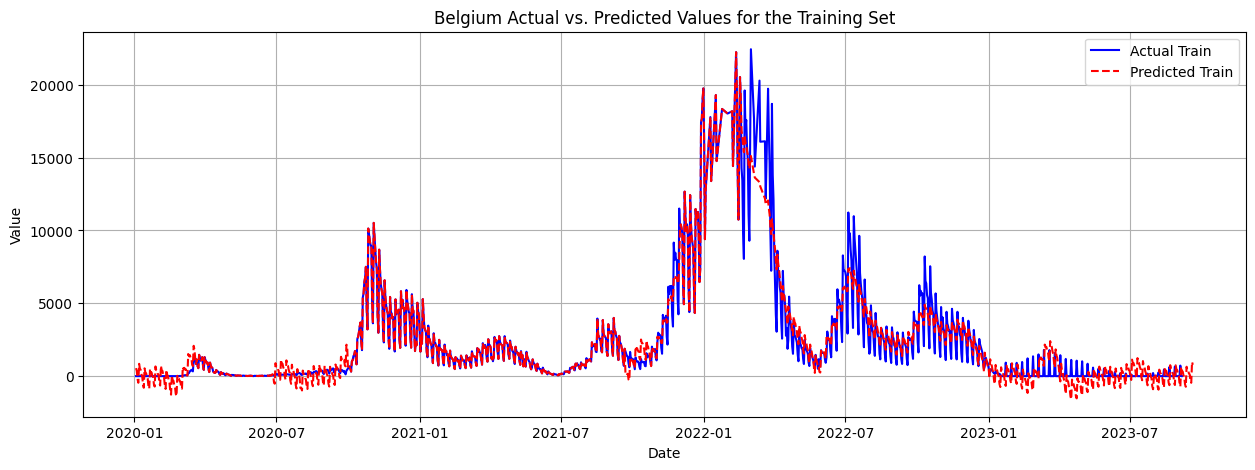

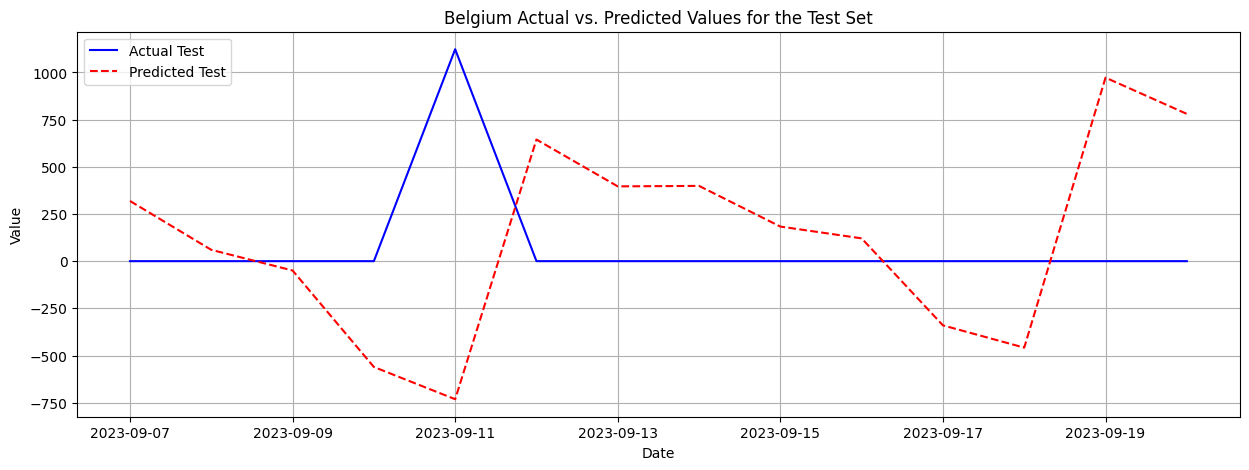

In [44]:
# Assuming 'ds' is a string representing dates, convert it to datetime
train['ds'] = pd.to_datetime(train['ds'])
test['ds'] = pd.to_datetime(test['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Plot for the training set
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(train['ds'], train['y'], label='Actual Train', color='b')
ax.plot(forecast['ds'], forecast['yhat'], label='Predicted Train', color='r', linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Belgium Actual vs. Predicted Values for the Training Set')
ax.legend()
plt.grid(True)
plt.show()

# Plot for the test set
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(test['ds'], test['y'], label='Actual Test', color='b')
ax.plot(forecast['ds'].tail(len(test)), forecast['yhat'].tail(len(test)), label='Predicted Test', color='r', linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Belgium Actual vs. Predicted Values for the Test Set')
ax.legend()
plt.grid(True)
plt.show()

In [45]:
# Extract the actual and forecasted values for the test set
actual_test_values = test['y'].values
predicted_test_values = forecast['yhat'].tail(len(test)).values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_test_values, predicted_test_values))
print(f"RMSE for the test set: {rmse}")

RMSE for the test set: 682.4977543114934


# Multiple Regressors